In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json

In [2]:
def getToken(itemid):
    try:
        url = "https://authorization.iudx.org.in/auth/v1/token"

        payload = '{"itemId":"'+itemid+'","itemType": "resource","role": "consumer"}'
        headers = {
          'clientId': '6e35f7e5-b1aa-4117-8485-1acc78f054ab',
          'clientSecret': '19496cf8b6817fee23ca45e9409a4d2b6b456ada',
          'Content-Type': 'application/json'
        }

        response = requests.request("POST", url, headers=headers, data=payload)

        return str(response.json()["results"]["accessToken"])
    
    except Exception as e:
        print("Error Occurred while fetching token -> ",e)



In [3]:
def getData(itemid,fromDate,toDate,baseurl):

    ID = itemid
    fromtime = fromDate
    totime = toDate

    url=baseurl+"?id="+ID+"&timerel=during&time="+fromtime+"&endtime="+totime

    payload={}
    
    headers = {
      'token': getToken(itemid)
    }
    
    response = requests.request("GET", url, headers=headers, data=payload)
    
    
    if "results" in response.json().keys():
        res = response.json()['results'] 
        return pd.DataFrame(res)
    else:
        return response.text


In [4]:
def checkDuplicates(df):
    if df[df.duplicated()].shape[0] != 0: 
        df.drop_duplicates(inplace=True)
        display(df)
        return "Duplicates present in the dataset, Removing Duplicates ..."
    else:
        return "No Duplicated Found"


## Fetching Data from IUDX 

In [5]:
# Fuel Consumption

itemid = "varanasismartcity.gov.in/62d1f729edd3d2a1a090cb1c6c89356296963d55/rs.iudx.org.in/varanasi-swm-vehicle-fuel-info/fuel-consumption"
fromDate = "2022-02-10T00:00:00Z"
to = "2022-02-20T23:59:10Z"
baseurl = "https://rs.iudx.org.in/ngsi-ld/v1/temporal/entities"


fc = getData(itemid,fromDate,to,baseurl)
# display(fc.hist())
fc

,license_plate,fuelEfficiency,id,vehicleType,observationDateTime
0,CHASIS NO 1659764,4.0,varanasismartcity.gov.in/62d1f729edd3d2a1a090c...,Hopper,2022-02-10T23:15:00+05:30
1,CHASSIS-1659749,8.0,varanasismartcity.gov.in/62d1f729edd3d2a1a090c...,Hopper,2022-02-10T23:15:00+05:30
2,CHASSIS-1659750,8.0,varanasismartcity.gov.in/62d1f729edd3d2a1a090c...,Hopper,2022-02-10T23:15:00+05:30
3,CHASSIS-1659763,6.0,varanasismartcity.gov.in/62d1f729edd3d2a1a090c...,QRT,2022-02-10T23:15:00+05:30
4,UP60KT0647,0.0,varanasismartcity.gov.in/62d1f729edd3d2a1a090c...,Auto Tipper,2022-02-10T23:15:00+05:30
...,...,...,...,...,...
3763,UP65KT1067,5.0,varanasismartcity.gov.in/62d1f729edd3d2a1a090c...,Auto Tipper,2022-02-20T23:15:07+05:30
3764,UP-65-KT-1071,4.0,varanasismartcity.gov.in/62d1f729edd3d2a1a090c...,Auto Tipper,2022-02-20T23:15:07+05:30
3765,UP65KT1073,0.0,varanasismartcity.gov.in/62d1f729edd3d2a1a090c...,Dumper Placer,2022-02-20T23:15:07+05:30
3766,V-104,4.0,varanasismartcity.gov.in/62d1f729edd3d2a1a090c...,Refused Compactor,2022-02-20T23:15:07+05:30


array([[<AxesSubplot:title={'center':'fuelFilled'}>]], dtype=object)

,fuelType,observationDateTime,vehilceTrackerDevice,fuelFilled,id,reportID,license_plate
0,Diesel,2022-02-13T08:34:08+05:30,GPS Not Installed,8.0,varanasismartcity.gov.in/62d1f729edd3d2a1a090c...,DP1095387,UP65KT2679
1,Petrol,2022-02-13T08:32:26+05:30,GPS Not Installed,15.0,varanasismartcity.gov.in/62d1f729edd3d2a1a090c...,DP1095385,UP65CW6984
2,Diesel,2022-02-13T08:21:05+05:30,GPS Installed,12.0,varanasismartcity.gov.in/62d1f729edd3d2a1a090c...,DP1095383,UP65DT5023
3,Diesel,2022-02-13T08:11:04+05:30,GPS Not Installed,28.0,varanasismartcity.gov.in/62d1f729edd3d2a1a090c...,DP1095381,UP65AG1009
4,Diesel,2022-02-13T08:09:20+05:30,GPS Not Installed,25.0,varanasismartcity.gov.in/62d1f729edd3d2a1a090c...,DP1095379,UP65DT3340
...,...,...,...,...,...,...,...
1257,Diesel,2022-02-20T09:49:15+05:30,GPS Not Installed,15.0,varanasismartcity.gov.in/62d1f729edd3d2a1a090c...,DP1096564,UP65AG0590
1258,Diesel,2022-02-20T09:42:13+05:30,GPS Not Installed,10.0,varanasismartcity.gov.in/62d1f729edd3d2a1a090c...,DP1096562,WATER PUMP NAGWA
1259,Diesel,2022-02-20T09:15:04+05:30,GPS Installed,21.0,varanasismartcity.gov.in/62d1f729edd3d2a1a090c...,DP1096561,UP65AG1005
1260,Diesel,2022-02-20T08:48:05+05:30,GPS Not Installed,25.0,varanasismartcity.gov.in/62d1f729edd3d2a1a090c...,DP1096560,UP65AG0615


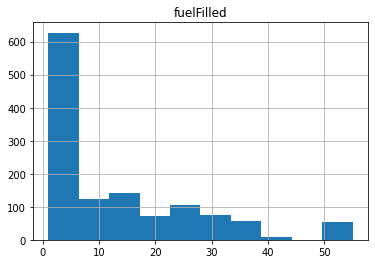

In [6]:
# Fuel Disbursement

itemid = "varanasismartcity.gov.in/62d1f729edd3d2a1a090cb1c6c89356296963d55/rs.iudx.org.in/varanasi-swm-vehicle-fuel-info/fuel-disbursement"
fromDate = "2022-02-10T00:00:00+05:30"
to = "2022-02-20T23:59:10+05:30"
baseurl = "https://rs.iudx.org.in/ngsi-ld/v1/temporal/entities"


fd = getData(itemid,fromDate,to,baseurl)
display(fd.hist())
fd

## ANALYSIS

### 1) FUEL DISBURSEMENT

In [7]:
fd.drop(["id"],axis=1,inplace=True)
fd["observationDateTime"]=pd.to_datetime(fd["observationDateTime"],errors ='coerce')
fd["date"] = fd["observationDateTime"].dt.date
fd['date'] = pd.to_datetime(fd['date'],format="%Y-%m-%d")
display(fd)


,fuelType,observationDateTime,vehilceTrackerDevice,fuelFilled,reportID,license_plate,date
0,Diesel,2022-02-13 08:34:08+05:30,GPS Not Installed,8.0,DP1095387,UP65KT2679,2022-02-13
1,Petrol,2022-02-13 08:32:26+05:30,GPS Not Installed,15.0,DP1095385,UP65CW6984,2022-02-13
2,Diesel,2022-02-13 08:21:05+05:30,GPS Installed,12.0,DP1095383,UP65DT5023,2022-02-13
3,Diesel,2022-02-13 08:11:04+05:30,GPS Not Installed,28.0,DP1095381,UP65AG1009,2022-02-13
4,Diesel,2022-02-13 08:09:20+05:30,GPS Not Installed,25.0,DP1095379,UP65DT3340,2022-02-13
...,...,...,...,...,...,...,...
1257,Diesel,2022-02-20 09:49:15+05:30,GPS Not Installed,15.0,DP1096564,UP65AG0590,2022-02-20
1258,Diesel,2022-02-20 09:42:13+05:30,GPS Not Installed,10.0,DP1096562,WATER PUMP NAGWA,2022-02-20
1259,Diesel,2022-02-20 09:15:04+05:30,GPS Installed,21.0,DP1096561,UP65AG1005,2022-02-20
1260,Diesel,2022-02-20 08:48:05+05:30,GPS Not Installed,25.0,DP1096560,UP65AG0615,2022-02-20


##### 1.1. Duplicates Check

In [8]:
checkDuplicates(fd)

'No Duplicated Found'

##### 1.2. General information of the data-types of attributes

In [9]:
display(fd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1262 entries, 0 to 1261
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype                                
---  ------                --------------  -----                                
 0   fuelType              1262 non-null   object                               
 1   observationDateTime   1262 non-null   datetime64[ns, pytz.FixedOffset(330)]
 2   vehilceTrackerDevice  1262 non-null   object                               
 3   fuelFilled            1262 non-null   float64                              
 4   reportID              1262 non-null   object                               
 5   license_plate         1262 non-null   object                               
 6   date                  1262 non-null   datetime64[ns]                       
dtypes: datetime64[ns, pytz.FixedOffset(330)](1), datetime64[ns](1), float64(1), object(4)
memory usage: 69.1+ KB


None

##### 1.3. Statistics of Quantitative Properties

In [10]:
display(fd.describe())

,fuelFilled
count,1262.000000
mean,13.012678
std,13.723039
min,1.000000
25%,3.000000
50%,7.000000
75%,21.000000
max,55.000000


##### 1.4. Statistics of Text Properties


In [11]:
display(fd.describe(include="object"))

,fuelType,vehilceTrackerDevice,reportID,license_plate
count,1262,1262,1262,1262
unique,2,2,1262,177
top,Diesel,GPS Not Installed,DP1095387,UP65GT9525
freq,1260,737,1,23


##### 1.5. Fuel types available

In [12]:
fd["fuelType"].value_counts()

Diesel    1260
Petrol       2
Name: fuelType, dtype: int64

### 2) FUEL CONSUMPTION

In [13]:
fc.drop(["id"],axis=1,inplace=True)
fc["observationDateTime"]=pd.to_datetime(fc["observationDateTime"],errors ='coerce')
fc["date"] = fc["observationDateTime"].dt.date
fc['date'] = pd.to_datetime(fc['date'],format="%Y-%m-%d")

display(fc)

,license_plate,fuelEfficiency,vehicleType,observationDateTime,date
0,CHASIS NO 1659764,4.0,Hopper,2022-02-10 23:15:00+05:30,2022-02-10
1,CHASSIS-1659749,8.0,Hopper,2022-02-10 23:15:00+05:30,2022-02-10
2,CHASSIS-1659750,8.0,Hopper,2022-02-10 23:15:00+05:30,2022-02-10
3,CHASSIS-1659763,6.0,QRT,2022-02-10 23:15:00+05:30,2022-02-10
4,UP60KT0647,0.0,Auto Tipper,2022-02-10 23:15:00+05:30,2022-02-10
...,...,...,...,...,...
3763,UP65KT1067,5.0,Auto Tipper,2022-02-20 23:15:07+05:30,2022-02-20
3764,UP-65-KT-1071,4.0,Auto Tipper,2022-02-20 23:15:07+05:30,2022-02-20
3765,UP65KT1073,0.0,Dumper Placer,2022-02-20 23:15:07+05:30,2022-02-20
3766,V-104,4.0,Refused Compactor,2022-02-20 23:15:07+05:30,2022-02-20


##### 2.1. Duplicates Check

In [14]:
checkDuplicates(fc)

'No Duplicated Found'

##### 2.2. General information of the data-types of attributes

In [15]:
display(fc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3768 entries, 0 to 3767
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype                                
---  ------               --------------  -----                                
 0   license_plate        3768 non-null   object                               
 1   fuelEfficiency       3724 non-null   float64                              
 2   vehicleType          3768 non-null   object                               
 3   observationDateTime  3768 non-null   datetime64[ns, pytz.FixedOffset(330)]
 4   date                 3768 non-null   datetime64[ns]                       
dtypes: datetime64[ns, pytz.FixedOffset(330)](1), datetime64[ns](1), float64(1), object(2)
memory usage: 147.3+ KB


None

##### 2.3. Statistics of Quantitative Properties

In [16]:
display(fc.describe())

,fuelEfficiency
count,3724.000000
mean,3.137487
std,2.807534
min,0.000000
25%,0.000000
50%,4.000000
75%,6.000000
max,8.000000


For eg., here 75% represents that 75 percent of the data has a fuel efficiency of less than 6.0

##### 2.4. Statistics of Text Properties

In [17]:
display(fc.describe(include="object"))

,license_plate,vehicleType
count,3768,3768
unique,345,11
top,CHASIS NO 1659764,Auto Tipper
freq,11,2872


## 3) COMBINING DATASETS FOR ANALYSIS

In [18]:
fd_fc = fd.merge(fc, on=["license_plate","date"])
fd_fc

,fuelType,observationDateTime_x,vehilceTrackerDevice,fuelFilled,reportID,license_plate,date,fuelEfficiency,vehicleType,observationDateTime_y
0,Diesel,2022-02-13 08:21:05+05:30,GPS Installed,12.0,DP1095383,UP65DT5023,2022-02-13,4.0,Tractor,2022-02-13 23:15:01+05:30
1,Diesel,2022-02-13 08:08:50+05:30,GPS Installed,21.0,DP1095377,UP65GT9658,2022-02-13,4.0,Refused Compactor,2022-02-13 23:15:02+05:30
2,Diesel,2022-02-13 08:05:54+05:30,GPS Installed,25.0,DP1095375,UP65DT3329,2022-02-13,5.0,Dumper,2022-02-13 23:15:01+05:30
3,Diesel,2022-02-13 08:04:31+05:30,GPS Installed,8.0,DP1095371,UP65AG0591,2022-02-13,4.0,Tractor,2022-02-13 23:15:00+05:30
4,Diesel,2022-02-13 07:56:16+05:30,GPS Installed,8.0,DP1095363,UP65AG0335,2022-02-13,4.0,Tractor,2022-02-13 23:15:00+05:30
...,...,...,...,...,...,...,...,...,...,...
520,Diesel,2022-02-20 20:26:55+05:30,GPS Installed,2.0,DP1096595,UP65ET4050,2022-02-20,6.0,Auto Tipper,2022-02-20 23:15:01+05:30
521,Diesel,2022-02-20 20:14:18+05:30,GPS Installed,23.0,DP1096593,UP65HT3951,2022-02-20,4.0,Refused Compactor,2022-02-20 23:15:02+05:30
522,Diesel,2022-02-20 10:30:41+05:30,GPS Installed,15.0,DP1096568,UP65AG0452,2022-02-20,5.0,Dumper Placer,2022-02-20 23:15:00+05:30
523,Diesel,2022-02-20 09:15:04+05:30,GPS Installed,21.0,DP1096561,UP65AG1005,2022-02-20,4.0,Refused Compactor,2022-02-20 23:15:00+05:30


In [19]:
print(fd_fc.columns)
fd_fc = fd_fc[["date","license_plate","vehicleType","fuelType","fuelFilled","fuelEfficiency"]]


Index(['fuelType', 'observationDateTime_x', 'vehilceTrackerDevice',
       'fuelFilled', 'reportID', 'license_plate', 'date', 'fuelEfficiency',
       'vehicleType', 'observationDateTime_y'],
      dtype='object')


##### 3.1. Relationship between the amount of Fuel consumed and the Fuel efficiency disbursed

<AxesSubplot:xlabel='fuelEfficiency', ylabel='fuelFilled'>

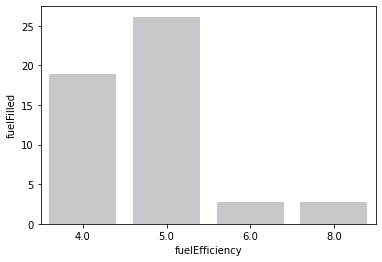

In [20]:
sns.barplot(x=fd_fc["fuelEfficiency"],y=fd_fc["fuelFilled"],data=fd_fc,color='#c4c7cc',ci=None)

##### 3.2. Visualizing the fuel effiency produced by various vehicle types

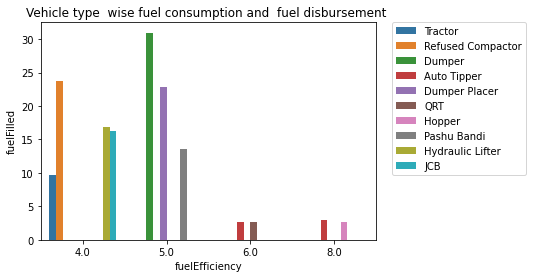

In [21]:
sns.barplot(x=fd_fc["fuelEfficiency"],y=fd_fc["fuelFilled"],hue="vehicleType",data=fd_fc, ci=None)
plt.title("Vehicle type  wise fuel consumption and  fuel disbursement ")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)


##### 3.3. Overlaying the graphs from 3.1 and 3.2 for better visualization

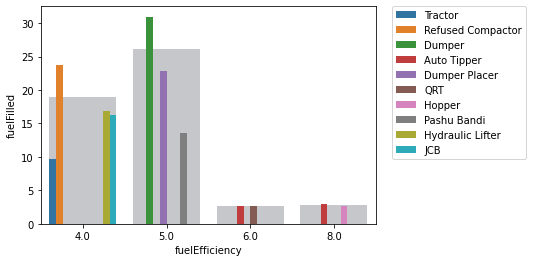

In [22]:
sns.barplot(x=fd_fc["fuelEfficiency"],y=fd_fc["fuelFilled"],data=fd_fc,color="#c4c7cc",ci=None)
sns.barplot(x=fd_fc["fuelEfficiency"],y=fd_fc["fuelFilled"],hue="vehicleType",data=fd_fc ,ci=None)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

##### 3.4. Subsetting a particular vehicle type to view its fuel consumption and disbursement

In [23]:
fd_fc[fd_fc["vehicleType"]=="Refused Compactor"]

,date,license_plate,vehicleType,fuelType,fuelFilled,fuelEfficiency
1,2022-02-13,UP65GT9658,Refused Compactor,Diesel,21.0,4.0
7,2022-02-13,UP65HT3951,Refused Compactor,Diesel,16.0,4.0
15,2022-02-13,UP65HT5228,Refused Compactor,Diesel,11.0,4.0
17,2022-02-13,UP65AG1005,Refused Compactor,Diesel,21.0,4.0
18,2022-02-13,UP65BT3489,Refused Compactor,Diesel,22.0,4.0
...,...,...,...,...,...,...
504,2022-02-20,UP65GT9658,Refused Compactor,Diesel,21.0,4.0
512,2022-02-20,UP65FT7960,Refused Compactor,Diesel,21.0,4.0
514,2022-02-20,UP65HT5228,Refused Compactor,Diesel,27.0,4.0
521,2022-02-20,UP65HT3951,Refused Compactor,Diesel,23.0,4.0
